# Statistics on Spectra

- Author : Sylvie Dagoret-Campagne
- creation date : 2024-01-16
- last update : 2024-01-16
- affiliation : IJCLab/IN2P3/CNRS

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
from spectractor.tools import from_lambda_to_colormap, wavelength_to_rgb
#%matplotlib widget 
import h5py
from scipy import interpolate
from astropy.time import Time

In [2]:
import matplotlib.ticker
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (18,8)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'
plt.rcParams['legend.fontsize']=  12
plt.rcParams['font.size'] = 12

# Read pandas Series

In [5]:
!ls Data_Auxtel_Spectro/

spec_series_repo_embargo.csv  spec_series_repo_main.csv


In [14]:
files = [ "Data_Auxtel_Spectro/spec_series_repo_main.csv" , "Data_Auxtel_Spectro/spec_series_repo_embargo.csv"  ]
N = len(files)

In [15]:
all_df = [pd.read_csv(files[idx], index_col=0, header=0) for idx in range(N)]

In [16]:
df = pd.concat(all_df)

In [18]:
df.head()

,countVisitperBandperNight
day_obs,
20210218,12
20210707,46
20210908,55
20210909,55
20211005,18


## compute

In [20]:
def convertNumToDatestr(num):
    year = num//10_000
    month= (num-year*10_000)//100
    day = (num-year*10_000-month*100)

    year_str = str(year).zfill(4)
    month_str = str(month).zfill(2)
    day_str = str(day).zfill(2)
    
    datestr = f"{year_str}-{month_str}-{day_str}"
    return pd.to_datetime(datestr)

In [21]:
df["dateobs"] = [ convertNumToDatestr(num) for num in df.index ]

In [22]:
df.head()

,countVisitperBandperNight,dateobs
day_obs,,
20210218,12,2021-02-18
20210707,46,2021-07-07
20210908,55,2021-09-08
20210909,55,2021-09-09
20211005,18,2021-10-05


In [23]:
df["cumsum"] = df["countVisitperBandperNight"].cumsum()

In [24]:
df.head()

,countVisitperBandperNight,dateobs,cumsum
day_obs,,,
20210218,12,2021-02-18,12
20210707,46,2021-07-07,58
20210908,55,2021-09-08,113
20210909,55,2021-09-09,168
20211005,18,2021-10-05,186


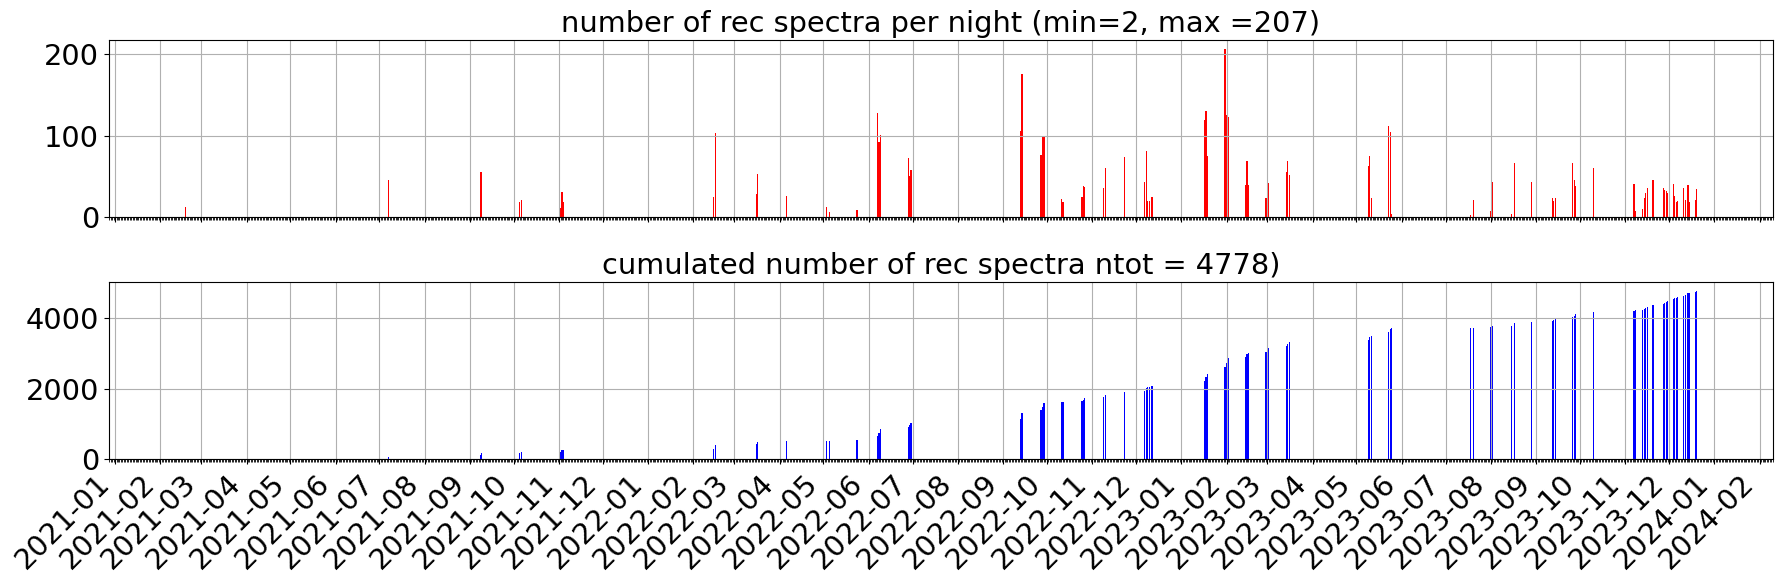

In [27]:
import matplotlib.dates as mdates
month_locator = mdates.MonthLocator(interval=1)
day_locator = mdates.DayLocator(interval=1)
year_month_formatter = mdates.DateFormatter("%Y-%m") 
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(18, 6),sharex=True)


# fit 1
#ax.plot(dt,df_spec_visit.values,marker='o', markersize=15,lw=0)
ax1.bar(df["dateobs"],df["countVisitperBandperNight"],lw=5,facecolor='r')
ax1.xaxis.set_major_locator(month_locator) # Locator for major axis only.
ax1.xaxis.set_minor_locator(day_locator)
ax1.xaxis.set_major_formatter(year_month_formatter)
ax1.grid()

minnspec= df["countVisitperBandperNight"].min()
maxnspec= df["countVisitperBandperNight"].max()
totnspec= df["countVisitperBandperNight"].sum()
title1 = f"number of rec spectra per night (min={minnspec}, max ={maxnspec})"
ax1.set_title(title1)

#fig.autofmt_xdate() # rotation
ax1.set_xticks(ax1.get_xticks(), ax1.get_xticklabels(), rotation=45, ha='right')

#ax2.bar(dt,df_spec_visit.cumsum().values,lw=5,facecolor='b')
ax2.bar(df["dateobs"],df["cumsum"],lw=5,facecolor='b')
ax2.xaxis.set_major_locator(month_locator) # Locator for major axis only.
ax2.xaxis.set_minor_locator(day_locator)
ax2.xaxis.set_major_formatter(year_month_formatter)
ax2.grid()

#fig.autofmt_xdate() # rotation
ax2.set_xticks(ax2.get_xticks(), ax2.get_xticklabels(), rotation=45, ha='right')
title2 = f"cumulated number of rec spectra ntot = {totnspec})"
ax2.set_title(title2)

plt.tight_layout()